# Predict Graduate Admissions with Python

This kernel presents a reference implementation of an graduate admission analysis that is built by using Python’s Scikit-Learn library. Logistic Regression, Random Forest, and Support Vector Machine models will be introduced. Also measure the accuracy of models that are built by using Machine Learning, and further development will be assessed.

# Data Preprocessing

In [1]:
import pandas as pd
gdata=pd.read_csv("../input/Admission_Predict_Ver1.1.csv")
col_names=gdata.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample Data:")
print(gdata.head())


Column names:
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Sample Data:
   Serial No.  GRE Score        ...         Research  Chance of Admit 
0           1        337        ...                1              0.92
1           2        324        ...                1              0.76
2           3        316        ...                1              0.72
3           4        322        ...                1              0.80
4           5        314        ...                0              0.65

[5 rows x 9 columns]


Rename columns to make their use easier. 

In [2]:
gdata=gdata.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa','Research':'research','Chance of Admit ':'chance'})

The type of columns can be found as follows:

In [3]:
gdata.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

Check shape of the data and whether there exist missing values:

In [4]:
print('Shape of the data:')
gdata.shape

Shape of the data:


(500, 9)

In [5]:
print('Missing values in columns:')
gdata.isnull().any()

Missing values in columns:


no          False
gre         False
toefl       False
rating      False
sop         False
lor         False
gpa         False
research    False
chance      False
dtype: bool

Fortunately, data has no missing values

The "chance" column is the outcome variable and takes value between 0 and 1. 1 represents that the subject is admitted to the program while 0 represents rejected applications.
Problem can be classified as a binary classification problem where outcome probability refers to the probability of subject being admitted to the program. Since only chance of admission is provided, 
the analysis will continue as a prediction analysis of chance of admission.

# Data Exploration

First of all, let us see the basic statistics of the data.


In [6]:
gdata.describe()

,no,gre,toefl,rating,sop,lor,gpa,research,chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Second, let us analyze the distribution of subjects' chance of admit in the data. Let us see how rating affects chance of admission:

In [7]:
gdata.groupby('rating').mean()

,no,gre,toefl,sop,lor,gpa,research,chance
rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings.
Now let us analyze the subjects with more than 82% of chance which is the third quartile of the chance data.

In [8]:
gdata[gdata['chance']>0.82].groupby('chance').mean()

,no,gre,toefl,rating,sop,lor,gpa,research
chance,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


## *Several observations:*

* Average GPAs of those with higher level of chance to admit is greater than 9 where the data average is 8.57.
* Average LOR, SOP, GRE and TOEFL grades of those with higher level of chance to admit is greater than the data average.

# Data Visualization

## Histogram of Admission Chance

Let us visualize our data to get a much clearer picture of the data and the significant features.


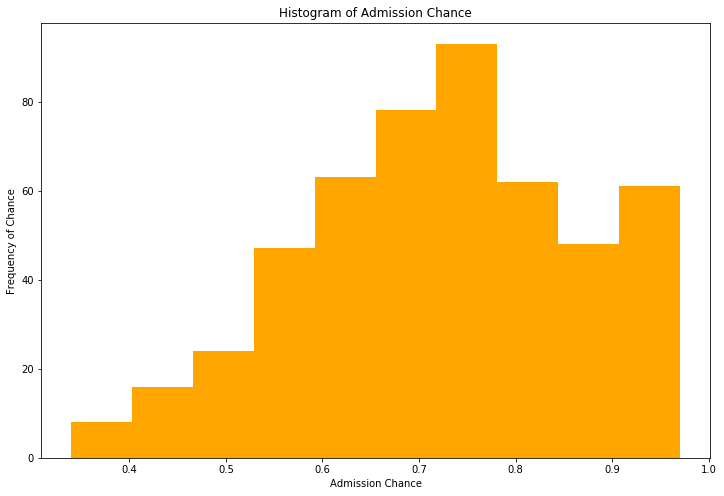

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.hist(gdata['chance'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

Histogram shows us that 'chance of admission' column is well distributed in data.

## Line Plot for Research Output and The Chance of Admission

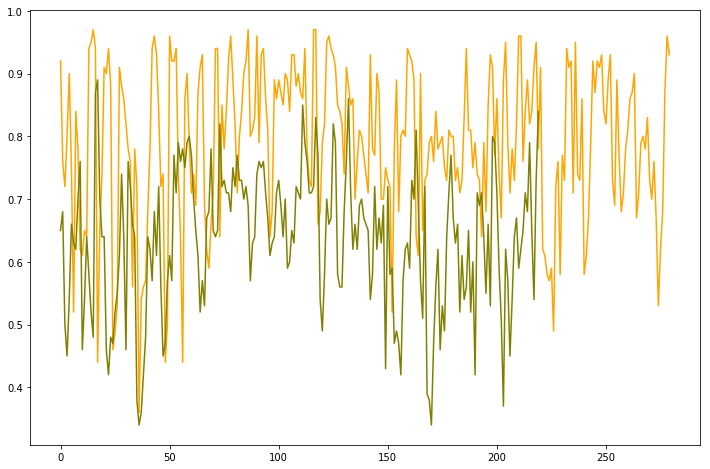

In [10]:
plt.figure(figsize=(12,8))
plt.plot(range(len(gdata[gdata['research']==1])), gdata[gdata['research']==1]['chance'], color='orange')
plt.plot(range(len(gdata[gdata['research']==0])), gdata[gdata['research']==0]['chance'], color='olive')
plt.show()

The chance of admission depends a great deal on the subjects' research output; hence, research can be a good predictor in predicting the outcome.

## Scatter Plot of University Rating and The Chance of Admission

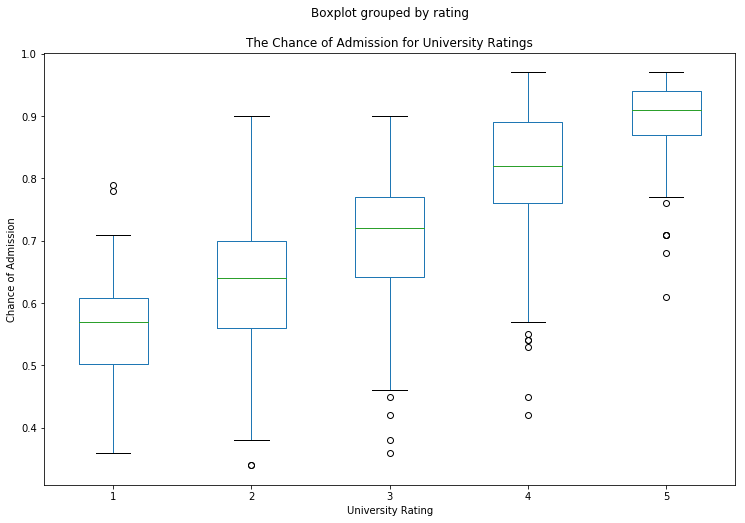

In [11]:
gdata.boxplot(column='chance',by='rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

As it can be seen from the boxplot chart, chance of admission is higher within the applicants of lower rated (5) universities.

## Histogram of Numeric Variables

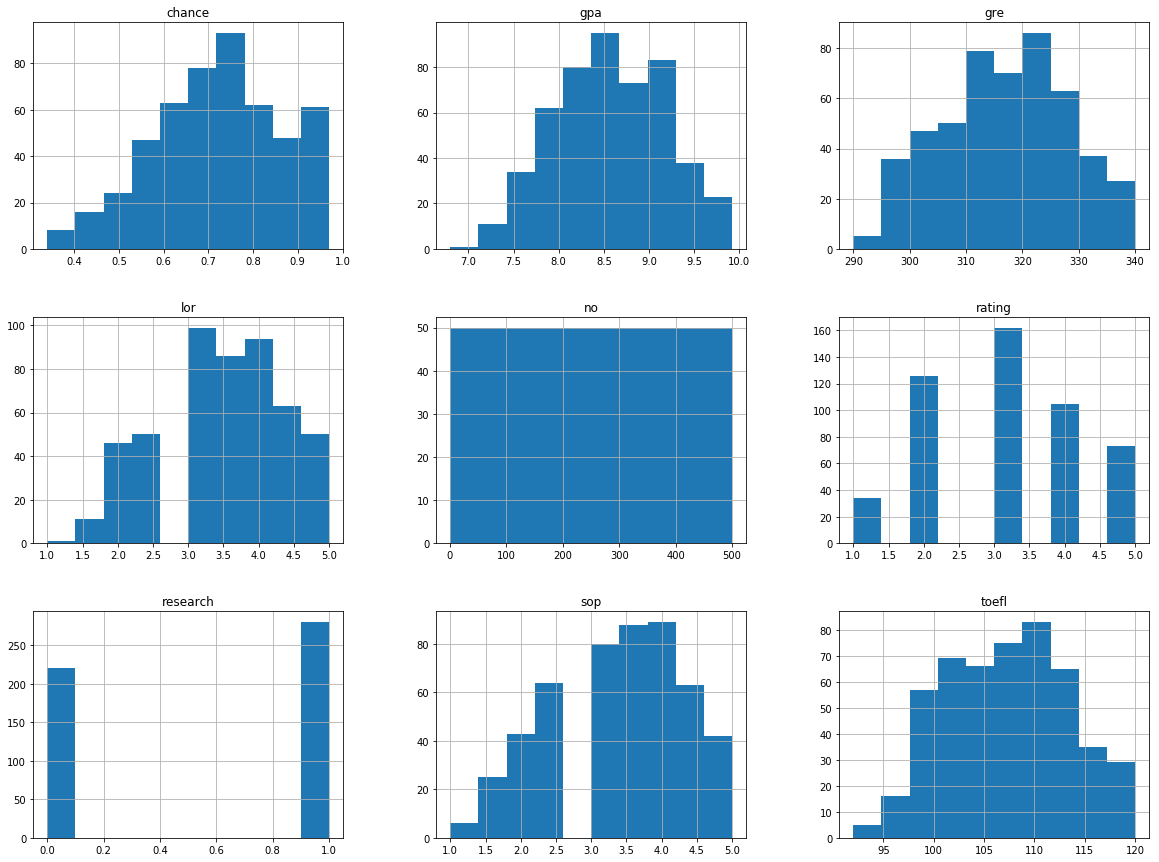

In [12]:
gdata.hist(bins=10, figsize=(20,15))
plt.show()

# Data Preparation

As it  can be seen from Data Preprocessing section above, graduate admission data is only include numerical variables. Hence, only the following steps should be implemented before model devolopment:

* The outcome variable is 'chance', and all other features are predictors.
* 'no' variable should be dropped from dataset since it only indicator of the instances

In [13]:
gdata.drop(['no'],axis=1,inplace=True)
var=gdata.columns.values.tolist()
y=gdata['chance']
x=[i for i in var if i not in ['chance']]
x=gdata[x]

Data will be splitted using train_test_split module of scikitlearn library where splitting ratio is chosen as 20% for test data.

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

Data normalization is important in order to represent data in comparable scales. 

In [15]:
from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda

# Classification Models & Furher Analysis

In order to make classification models, outcome of the classification is defined as 'status' which takes value of True for the applicants that have more than 82% chance. Third quartile, 82%, is chosen as threshold since median of the chance data, 72%, is pretty high.

In [16]:
import numpy as np
cy_train=[1 if chance > 0.82 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.82 else 0 for chance in y_test]
cy_test=np.array(cy_test)



## Logistic Regression

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression accuracy: 0.960
--------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.90      0.90      0.90        20

   micro avg       0.96      0.96      0.96       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.96      0.96      0.96       100



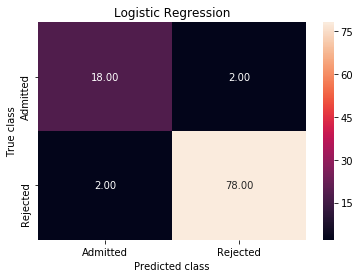

In [17]:
# Fitting logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, cy_train)


# Printing accuracy score & confusion matrix
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(x_test))))
print('--------------------------------------')
from sklearn.metrics import classification_report
print(classification_report(cy_test, lr.predict(x_test)))

cy = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_confm = confusion_matrix(cy, cy_test, [1,0])
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.show()

## Random Forest

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy: 0.960
--------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98        80
           1       0.94      0.85      0.89        20

   micro avg       0.96      0.96      0.96       100
   macro avg       0.95      0.92      0.94       100
weighted avg       0.96      0.96      0.96       100



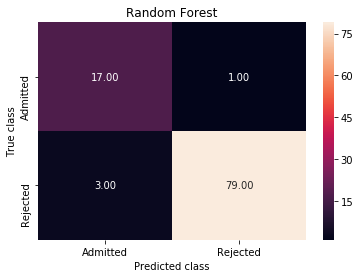

In [18]:
# Fitting random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, cy_train)

# Printing accuracy score & confusion matrix
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(cy_test, rf.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, rf.predict(x_test)))

cy = rf.predict(x_test)
rf_confm = confusion_matrix(cy, cy_test, [1,0])
sns.heatmap(rf_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()

## Support Vector Machine

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support vector machine accuracy: 0.960
--------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.90      0.90      0.90        20

   micro avg       0.96      0.96      0.96       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.96      0.96      0.96       100



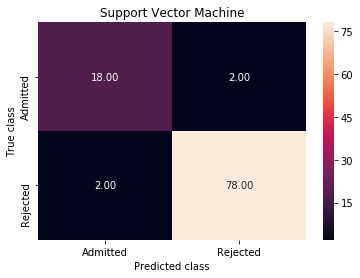

In [19]:
# Fitting support vector machine model
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, cy_train)

# Printing accuracy score & confusion matrix
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(cy_test, svc.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, svc.predict(x_test)))

cy = svc.predict(x_test)
svc_confm = confusion_matrix(cy, cy_test, [1,0])
sns.heatmap(svc_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.show()

How often does my classifier predict admitted students correctly? This measurement is called “recall” and a quick look at these diagrams can demonstrate that models ara close but logistic regression and support vector machine models are slightly better for this criteria. Out of 20 True admitted applicants, LR and SVM are correctly classified 18 of them which means the models are approximately have 90% of "recall".

How often does my classifier predict students that will be admitted correctly? This measurement is called “precision” and Random Forest performs slightly better (17 out of 18) than other classifiers.

All classifiers have the same accuracy score which is 96%.

# Feature Importance for Random Forest Model

In order to represent the most important features which influence whether an applicant is admitted in college, random forest classifier is used.

In [20]:
f_imp=pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
print(f_imp)

gpa         0.470100
toefl       0.222667
rating      0.120103
gre         0.092364
sop         0.038996
lor         0.038499
research    0.017271
dtype: float64
